In [335]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, Lasso, Ridge, RidgeCV, ElasticNet
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import LabelEncoder, StandardScaler

import seaborn as sn #visual representation

from sklearn.preprocessing import StandardScaler, MinMaxScaler ## standrard scalig 
from sklearn.compose import ColumnTransformer

from sklearn import metrics



In [336]:
# Import the file with pandas
df = pd.read_csv('lisbon-houses.csv.xls') 

# print the first lines
df.head(5)


,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Country,District,Municipality,Parish,Price M2,Price
0,101,Used,Homes,Apartment,3,1,76,152,0,38.7792,-9.1186,Portugal,Lisboa,Lisboa,Olivais,2463,198000
1,102,Used,Homes,Duplex,5,3,190,380,0,38.7056,-9.1784,Portugal,Lisboa,Lisboa,Alcantara,3125,1270000
2,103,Used,Homes,Apartment,1,1,26,52,0,38.7058,-9.1639,Portugal,Lisboa,Lisboa,Estrela,4005,140000
3,104,Used,Homes,Apartment,5,4,185,370,0,38.7466,-9.1640,Portugal,Lisboa,Lisboa,Sao Domingos de Benfica,3412,995000
4,105,Used,Homes,Apartment,7,1,150,300,0,38.7323,-9.1287,Portugal,Lisboa,Lisboa,Arroios,3277,570000


In [337]:
df = df.drop(['Country', 'District','Municipality'], axis=1)
df = df.drop(['Id'], axis=1)

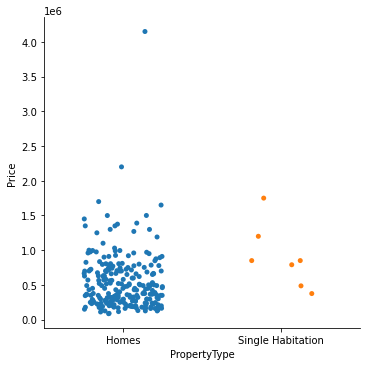

In [338]:
sn.catplot(x='PropertyType', y='Price',  data=df,jitter='0.25')

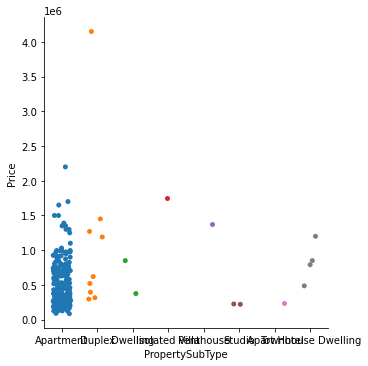

In [339]:
sn.catplot(x='PropertySubType', y='Price',  data=df,jitter='0.25')

In [340]:
df.shape

(246, 13)

In [341]:
df = df.drop(['PropertyType'], axis=1)

df = df.drop(['PropertySubType'], axis=1)

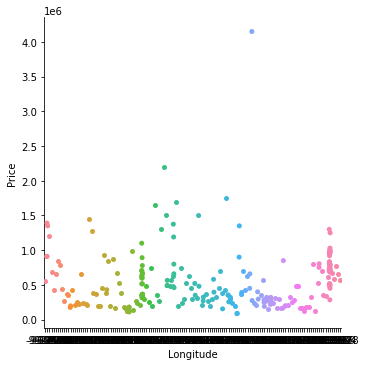

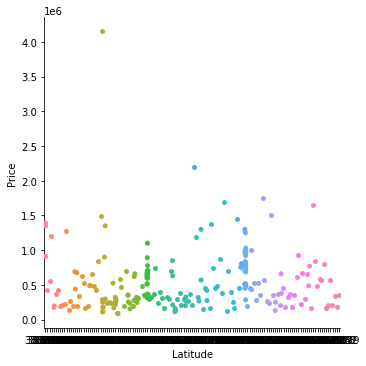

In [342]:
sn.catplot(x='Longitude', y='Price',  data=df,jitter='0.25')
sn.catplot(x='Latitude', y='Price',  data=df,jitter='0.25')

In [343]:
df = df.drop(['Longitude', 'Latitude'], axis=1)

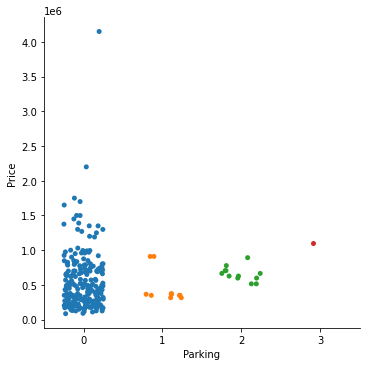

In [344]:
sn.catplot(x='Parking', y='Price',  data=df,jitter='0.25')

In [345]:
df['WithParking'] = np.where(df['Parking'] == '0', '0', '1')
df = df.drop(['Parking'], axis=1)

In [346]:
df.shape

(246, 9)

In [347]:
df.head()

le=LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition'])
df['Parish'] = le.fit_transform(df['Parish'])


In [348]:
df.head()

,Condition,Bedrooms,Bathrooms,AreaNet,AreaGross,Parish,Price M2,Price,WithParking
0,3,3,1,76,152,16,2463,198000,1
1,3,5,3,190,380,1,3125,1270000,1
2,3,1,1,26,52,12,4005,140000,1
3,3,5,4,185,370,22,3412,995000,1
4,3,7,1,150,300,4,3277,570000,1


In [365]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size=0.1,random_state=155)


In [366]:
#scaler = StandardScaler()
#col_names=['AreaNet', 'Price M2', 'AreaGross']
#features = X_train[col_names].copy()

#scaler.fit(features)
#features2 = scaler.transform(features)

X_train_scaled = X_train.copy()
#X_train_scaled[col_names]  = features2

#X_train_scaled=X_train_scaled.dropna()

#X_train_scaled = X_train_scaled.reset_index()


In [367]:
#scaler = StandardScaler()
#col_names=['AreaNet', 'Price M2', 'AreaGross']
#features = X_test[col_names].copy()

#scaler.fit(features)
#features2 = scaler.transform(features)

X_test_scaled = X_test.copy()
#X_test_scaled[col_names] = features2

#X_test_scaled=X_test_scaled.dropna()

#X_test_scaled = X_test_scaled.reset_index()

In [368]:
X_test_scaled.head()

,Condition,Bedrooms,Bathrooms,AreaNet,AreaGross,Parish,Price M2,Price,WithParking
75,2,3,3,121,242,9,3859,892000,1
220,1,4,2,102,204,14,2881,249000,1
63,2,2,2,69,138,9,3859,515000,1
207,1,3,2,103,206,2,3623,460000,1
156,0,3,2,84,168,23,3402,315000,1


In [369]:
y_train = X_train_scaled["Price"].values
X_train_scaled = X_train_scaled.drop("Price", axis=1).values

y_test = X_test_scaled["Price"].values
X_test_scaled = X_test_scaled.drop("Price", axis=1).values

# #MODELS

Linear Regression

In [370]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled,y_train)
y_p=model_lr.predict(X_test_scaled)

df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_p})
print(df2.head(10))

print('R2- SCORE:', metrics.r2_score(y_test,y_p))
print('Loss:', metrics.mean_absolute_percentage_error(y_test,y_p))

   Actual      Predicted
0  892000  750099.106792
1  249000  335858.475192
2  515000  448804.783468
3  460000  508555.913128
4  315000  377405.276181
5  315000  452913.783302
6  634000  598904.316882
7  715000  575649.060903
8  160000  220016.381450
9  240000  480042.804981
R2- SCORE: 0.7249925265818309
Loss: 0.3209336685806386


Lasso

In [371]:
model_lasso = Lasso(alpha = 0.000001,tol=0.0001,fit_intercept=True, max_iter=100000)
model_lasso.fit(X_train_scaled,y_train)
y_pred = model_lasso.predict(X_test_scaled)


df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df2.head(10))

from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test,y_pred))

   Actual      Predicted
0  892000  750099.106789
1  249000  335858.475195
2  515000  448804.783465
3  460000  508555.913128
4  315000  377405.276184
5  315000  452913.783304
6  634000  598904.316882
7  715000  575649.060904
8  160000  220016.381450
9  240000  480042.804982
R2- SCORE: 0.7249925265813179
MAPE: 0.32093366858101113


Ridge

In [372]:
model_ridge = Ridge(alpha = 0.0001, normalize = False,fit_intercept=False, tol = 0.001, \
              solver ='sag', random_state = 123)

model_ridge.fit(X_train_scaled, y_train)
y_pred=model_ridge.predict(X_test_scaled)


df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_p})
print(df2.head(10))

from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_p))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test,y_pred))

   Actual      Predicted
0  892000  750099.106792
1  249000  335858.475192
2  515000  448804.783468
3  460000  508555.913128
4  315000  377405.276181
5  315000  452913.783302
6  634000  598904.316882
7  715000  575649.060903
8  160000  220016.381450
9  240000  480042.804981
R2- SCORE: 0.7249925265818309
MAPE: 0.38246602566192633
